In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rubin_sim.maf as maf

In [66]:
nchances = maf.MetricBundle.load('baseline_v3_0_10yrs_DiscoveryNChances_Vatira_1_quad_in_1_night_detection_loss_MOOB.npz')
nchances1 = maf.MetricBundle.load('baseline_v3_0_10yrs_DiscoveryNChances_Vatira_Single_detection_detection_loss_MOOB.npz')
diff = maf.MetricBundle.load('baseline_v3_0_10yrs_DifferentialCompleteness_Vatira_1_quad_in_1_night_detection_loss_MOOB.npz')

/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/slicers/base_slicer.py:390: UserWarning: Cannot use saved slicer init values; falling back to defaults for baseline_v3_0_10yrs_DiscoveryNChances_Vatira_1_quad_in_1_night_detection_loss_MOOB.npz
  warnings.warn(
/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/slicers/base_slicer.py:390: UserWarning: Cannot use saved slicer init values; falling back to defaults for baseline_v3_0_10yrs_DiscoveryNChances_Vatira_Single_detection_detection_loss_MOOB.npz
  warnings.warn(


In [72]:
xx = np.where(nchances.metric_values.data > 0)[0]
dd = np.unique(xx)
xx1 = np.where(nchances1.metric_values.data > 0)[0]
dd1 = np.unique(xx1)

In [73]:
biggest = nchances.metric_values[dd].data.swapaxes(0, 1)[0]

array([357.,  11.,   3.,   3.,   0.,   1.,   0.,   0.,   0.,   1.])

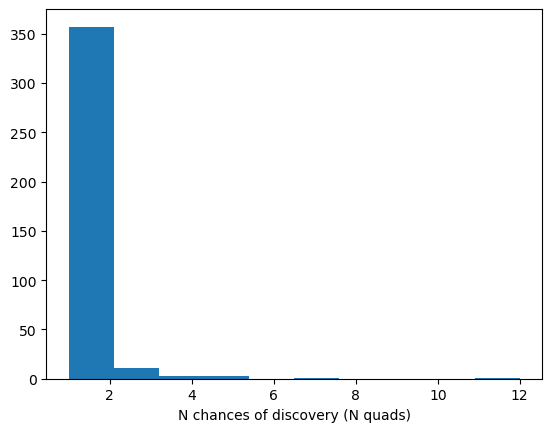

In [74]:
n,b,p = plt.hist(biggest,bins=10)
plt.xlabel("N chances of discovery (N quads)")
n

In [75]:
len(dd), len(dd1)

(376, 530)

array([486.,  25.,   9.,   3.,   4.,   1.,   1.,   0.,   0.,   1.])

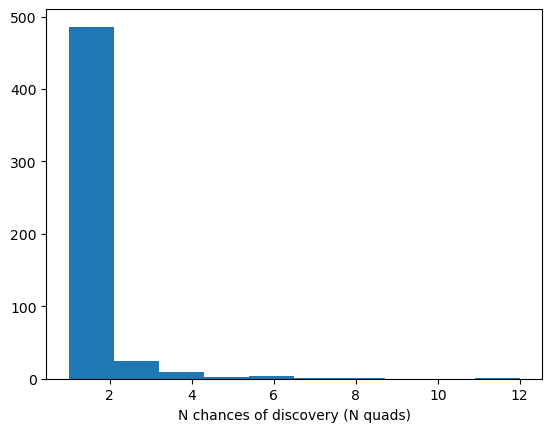

In [76]:
biggest1 = nchances1.metric_values[dd1].data.swapaxes(0, 1)[0]
n,b,p = plt.hist(biggest1,bins=10)
plt.xlabel("N chances of discovery (N quads)")
n

In [98]:
nchances.slicer.slice_points['H']

array([16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4, 17.6, 17.8, 18. ,
       18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6, 19.8, 20. , 20.2,
       20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8, 22. , 22.2, 22.4,
       22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8, 24. , 24.2, 24.4, 24.6,
       24.8, 25. , 25.2, 25.4, 25.6, 25.8, 26. , 26.2, 26.4, 26.6, 26.8,
       27. , 27.2, 27.4, 27.6, 27.8, 28. ])

In [95]:
nchances.slicer.slice_points['orbits']

,objId,q,e,inc,argPeri,Omega,tPeri,epoch,H,a,meanAnomaly,g,sed_filename,obj_id
0,V00000,0.420118,0.197929,22.087133,235.327905,358.024868,54528.093879,54466,24.302256,0.523791,198.558482,0.15,S.dat,0
1,V00001,0.502625,0.154670,20.240437,307.253649,236.531882,54472.149743,54466,24.800761,0.594590,346.779917,0.15,S.dat,1
2,V00002,0.507951,0.189877,44.810933,282.879508,10.805294,54638.027541,54466,24.248234,0.627005,18.496333,0.15,S.dat,2
3,V00003,0.408081,0.208435,7.553360,176.819873,129.547329,54545.953831,54466,24.476993,0.515537,147.110859,0.15,S.dat,3
4,V00004,0.390396,0.256538,8.190931,288.505112,242.228175,54472.827649,54466,20.489163,0.525105,342.314968,0.15,S.dat,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,V09995,0.447831,0.134858,17.120924,119.248601,330.761655,54540.523119,54466,24.578710,0.517639,162.778119,0.15,S.dat,9995
9996,V09996,0.487374,0.164372,34.843952,232.679307,128.839135,54563.488762,54466,23.750308,0.583242,144.282633,0.15,S.dat,9996
9997,V09997,0.519704,0.079071,43.929587,86.009789,305.652382,54588.812682,54466,24.668028,0.564326,74.469574,0.15,S.dat,9997
9998,V09998,0.344178,0.340393,6.078806,122.714118,210.664320,54534.674429,54466,19.843221,0.521793,180.422374,0.15,S.dat,9998


In [103]:
obs = pd.read_csv('baseline_v3.0_10yrs__vatiras_granvik_10k_obs.txt', comment='#', delim_whitespace=True)
obs.head()

,obj_id,time,ra,dec,dradt,ddecdt,phase,solarelon,helio_dist,geo_dist,...,night,observationStartMJD,rotSkyPos,seeingFwhmEff,seeingFwhmGeom,solarElong,visitExposureTime,dmag_color,dmag_trail,dmag_detect
0,11,62967.414922,338.402378,-0.093060,0.499458,0.651728,90.777979,41.582800,0.665119,0.740436,...,2749,62967.414922,49.883936,1.269010,1.095126,42.944912,30.0,-0.399899,0.150709,0.170063
1,11,62968.416111,338.928469,0.562650,0.533739,0.658322,90.423639,41.886436,0.669232,0.741200,...,2750,62968.416111,79.752346,1.251011,1.080331,41.662135,30.0,-0.399899,0.159705,0.183700
2,22,63674.401541,329.366527,-33.677273,0.801230,0.375649,82.593321,42.227152,0.674560,0.823929,...,3456,63674.401541,181.241227,1.340649,1.154013,42.262080,30.0,-0.399899,0.155128,0.176724
3,22,63675.408781,330.338429,-33.279460,0.802071,0.397036,81.883445,42.236281,0.676011,0.832516,...,3457,63675.408781,174.853887,1.205235,1.042703,42.154766,30.0,-0.399899,0.178728,0.213525
4,26,62260.419611,0.143246,3.998665,0.775070,0.507439,103.043368,42.223382,0.695625,0.589708,...,2042,62260.419611,147.127361,1.728888,1.473146,43.476731,30.0,-0.399899,0.119291,0.124996


In [141]:
obs_m = obs.join(nchances.slicer.slice_points['orbits'], on='obj_id', how='left', lsuffix='', rsuffix='o')

In [142]:
m = 19
app_mag = obs_m.magV + obs_m.dmag_color + obs_m.dmag_detect + m  - obs_m.H
obs_m['appMag'] = app_mag

In [143]:
obs_m = obs_m.query('appMag <= fiveSigmaDepth')

In [144]:
print(len(obs_m))
print(len(obs_m.groupby(['obj_id'])))

6100
1461


obj_id
31      1
41      1
72      1
92      1
102     1
       ..
9927    1
9940    1
9956    1
9965    3
9976    1
Name: time, Length: 382, dtype: int64

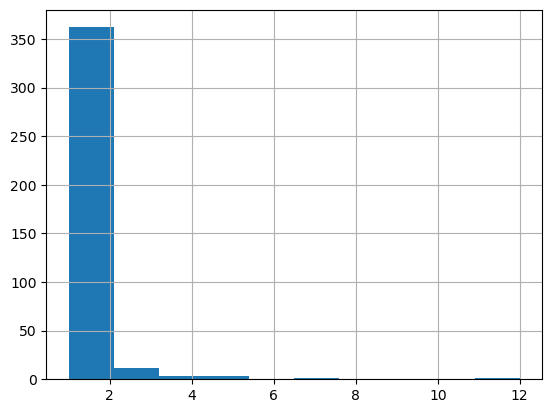

In [164]:
obs_m.groupby(['obj_id', 'night']).count().query('time >= 4')['time'].groupby('obj_id').count().hist()
obs_m.groupby(['obj_id', 'night']).count().query('time >= 4')['time'].groupby('obj_id').count()

<AxesSubplot: >

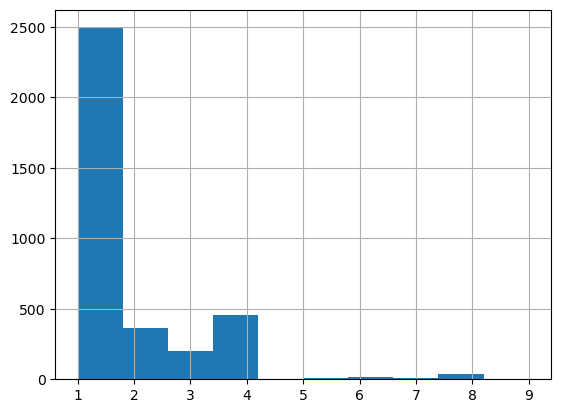

In [154]:
obs_m.groupby(['obj_id', 'night']).count()['time'].hist()

In [155]:
streak_idx = np.array([2403,  219, 1513, 2380, 5169, 2691, 2815, 5494, 4452, 4290, 2165,
       5391, 5776, 2514, 4659, 5493, 4803, 2881, 2080, 5169, 4354, 5969,
       2140,  552, 3480, 2871, 1723, 4771, 5129, 5372,  878,  870, 2643,
       5610, 2761, 3275, 4995, 4214,  446, 1216, 2153,  457, 2016, 5004,
       3084, 1059,  662, 1997, 3270, 3283, 3582,  818, 2594, 3749, 4290,
        990, 2989, 5721,  541, 6090, 2656, 3305, 3999, 3403, 2876, 2803,
       5846, 1361,  597, 2012, 4068, 4098,  742, 6089, 3046,  653, 5303,
        231, 4018, 4104, 2066, 3746, 1519, 4190, 2510,  487, 3245, 3823,
       2706, 3047,  384, 4888, 5425, 1558, 5165, 4909, 5367, 5950, 1614,
        173, 2919,  326,  837, 2683, 2280, 1300,  480, 5843, 1637, 4231,
       5701, 2983, 5774, 4189, 1854, 4410, 1434, 4773, 4615, 2035, 2006,
       5754, 3961, 3885,  599, 4625, 6063,  514,  661,  546, 1046, 5026,
       5158, 3860, 1261, 2019, 1428, 3071, 2911, 3009, 1786, 3892, 4513,
       5492, 2806,  867, 2941, 5158, 3000,  395, 1403, 3181, 5468, 4560,
       1862, 1640, 1672, 3085, 2811,  782, 3839,  391, 1385,  432, 1575,
       1614, 1996, 3282, 5021,  492, 2070, 4671, 2656, 2783, 3305,  984,
       2466, 3368, 5538, 4379, 5145, 2247, 2710, 3338,  527, 3114, 5638,
       6064, 5198,   96, 3269, 4027, 4317, 2193, 1890, 2928, 2897,  527,
       5684, 4161, 2008, 3653, 3617, 4159, 3547,  169, 5564,  862, 2273,
       3187, 6002, 2945, 4107, 4627, 4013, 3917, 4007,  182, 4202,  642,
        960, 3008, 3916, 1559, 1204, 5410, 2303, 2310, 3018, 2475,  697,
       5900,  198,  193, 1518, 1141,  643, 1869,  368, 2422, 3766, 3530,
       2905,   88,   39, 1269, 1699, 6089, 5519, 6029, 2105, 3921, 5761,
       1719, 1087, 1086, 1712,  447, 3337, 3583,  454, 1831, 2195, 3177,
       4971, 5184, 1914, 1378, 2278, 3540,   92, 5590, 1499, 2960, 6067,
       1314,  439, 5151, 3782,   36,  949,  306, 2467, 1068, 5621, 2252,
       4356, 5366, 5648, 2793, 5142, 1147, 2082,  213, 5662, 6015, 5566,
       3314,  753, 3106, 4486,  666, 4570, 5678,  673, 2446, 2688, 5948,
         73, 1017, 2086, 1037, 3744,  669, 1978, 3834, 4391, 2397, 5106,
       1502, 2395, 4060, 5552, 5533, 5731, 4084, 5654,  676,  834, 2626,
        915, 1868, 3571, 2536, 4407, 3306, 4232, 5697,  773,  924,  178,
       1783,   55, 5525, 5836, 1890, 2793, 5932])

In [157]:
streak_obs  = obs.drop(index=streak_idx)
len(streak_obs)

5765

In [160]:
sobs_m = streak_obs.join(nchances.slicer.slice_points['orbits'], on='obj_id', how='left', lsuffix='', rsuffix='o')
m = 19
app_mag = sobs_m.magV + sobs_m.dmag_color + sobs_m.dmag_detect + m  - sobs_m.H
sobs_m['appMag'] = app_mag
sobs_m = sobs_m.query('appMag <= fiveSigmaDepth')
print(len(sobs_m))
print(len(sobs_m.groupby(['obj_id'])))

5762
1427


<AxesSubplot: >

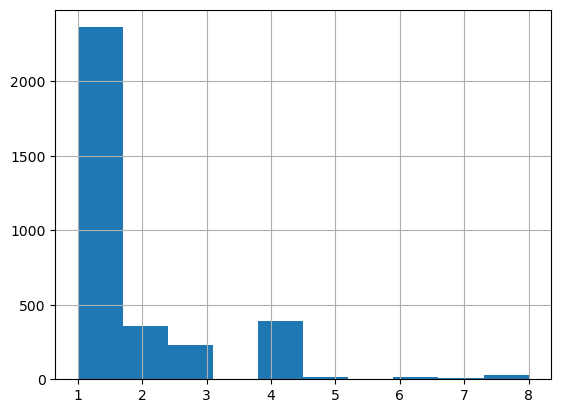

In [161]:
sobs_m.groupby(['obj_id', 'night']).count()['time'].hist()

obj_id
31      1
41      1
72      1
92      1
102     1
       ..
9921    2
9927    1
9940    1
9965    2
9976    1
Name: time, Length: 337, dtype: int64

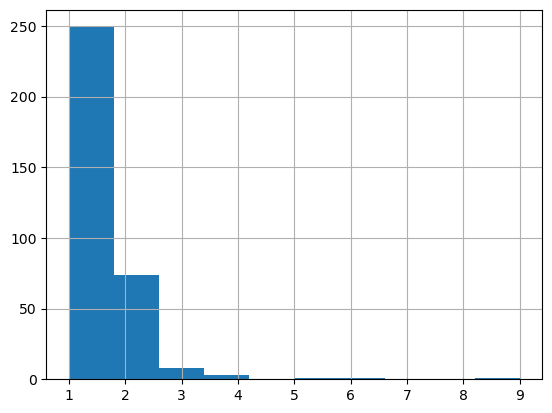

In [165]:
sobs_m.groupby(['obj_id', 'night']).count().query('time >= 4')['time'].groupby('obj_id').count().hist()
sobs_m.groupby(['obj_id', 'night']).count().query('time >= 4')['time'].groupby('obj_id').count()